<a href="https://colab.research.google.com/github/kn-neelalohitha/Learning-Deep-Learning-/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


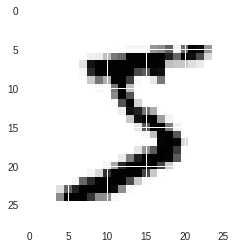

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(256, 3, 3, activation='relu', input_shape=(28,28,1))) # 28 -> 26
model.add(Convolution2D(128, 3, 3, activation='relu'))# 26 -> 24
model.add(Convolution2D(128, 3, 3, activation='relu'))# 24 -> 22
model.add(Convolution2D(64, 3, 3, activation='relu'))# 22 -> 20
model.add(Convolution2D(64, 3, 3, activation='relu'))#        18
model.add(Convolution2D(64, 3, 3, activation='relu'))# 16
model.add(Convolution2D(64, 3, 3, activation='relu'))# 14
model.add(Convolution2D(32, 3, 3, activation='relu'))# 12
model.add(Convolution2D(32, 3, 3, activation='relu'))# 10
model.add(Convolution2D(32, 3, 3, activation='relu'))# 8
model.add(Convolution2D(16, 3, 3, activation='relu'))# 6
model.add(Convolution2D(16, 3, 3, activation='relu'))# 4
model.add(Convolution2D(10, 3, 3, activation='relu'))# 2
model.add(Convolution2D(10, 1, 1, activation='relu'))# 2


model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` ca

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       295040    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        73792     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.4389 - acc: 0.8639
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1371 - acc: 0.9617
Epoch 3/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1048 - acc: 0.9717
Epoch 4/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0871 - acc: 0.9761
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0755 - acc: 0.9787
Epoch 6/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0678 - acc: 0.9819
Epoch 7/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0609 - acc: 0.9839
Epoch 8/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0574 - acc: 0.9839
Epoch 9/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0546 - acc: 0.9848
Epoch 10/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0512 - acc: 0.9861

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.057694773022504524, 0.986]


In [0]:
y_pred = model.predict(X_test)

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, initial_epoch = 10, verbose=1)

Epoch 11/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0492 - acc: 0.9866
Epoch 12/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0456 - acc: 0.9873
Epoch 13/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0450 - acc: 0.9879
Epoch 14/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0443 - acc: 0.9879
Epoch 15/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0423 - acc: 0.9892
Epoch 16/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0421 - acc: 0.9889
Epoch 17/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0427 - acc: 0.9884
Epoch 18/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0408 - acc: 0.9892
Epoch 19/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0392 - acc: 0.9895
Epoch 20/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0366 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 4s 369us/step
[0.0581368927479838, 0.9833]


In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.2124007e-17 1.4627134e-10 2.3321380e-09 9.1065488e-11 2.0564728e-16
  8.9996642e-11 6.5604588e-24 9.9999976e-01 1.9230006e-07 1.9239799e-11]
 [4.9529844e-03 1.3155194e-06 9.9293447e-01 7.3549454e-05 2.9331816e-06
  1.4252292e-06 4.5153243e-05 7.9389603e-05 1.9086432e-03 2.5499955e-07]
 [1.2639513e-16 9.9979585e-01 8.4735229e-06 7.1312179e-06 8.1930352e-08
  2.6185342e-06 1.7410588e-10 1.5246896e-04 3.3318276e-05 1.1329335e-09]
 [9.9990475e-01 8.5526015e-17 3.9453721e-06 1.6278625e-09 4.2858984e-11
  8.3674998e-08 3.8963999e-06 6.7659247e-09 8.7322427e-05 7.2096560e-09]
 [7.4020820e-15 2.0460975e-06 1.2255582e-08 7.9128899e-09 9.9996078e-01
  4.9023140e-11 4.9924149e-09 7.9556255e-09 2.4952794e-06 3.4746608e-05]
 [1.2035029e-14 9.9801254e-01 4.0847641e-05 1.0724355e-05 1.3088259e-06
  5.4889742e-06 2.2168979e-10 1.9018287e-03 2.7193611e-05 1.1166702e-08]
 [1.5314021e-10 1.9832964e-04 2.6656051e-07 4.0618247e-06 9.9751914e-01
  1.2790677e-07 2.2504949e-07 1.3861032e-04 5.2515847e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

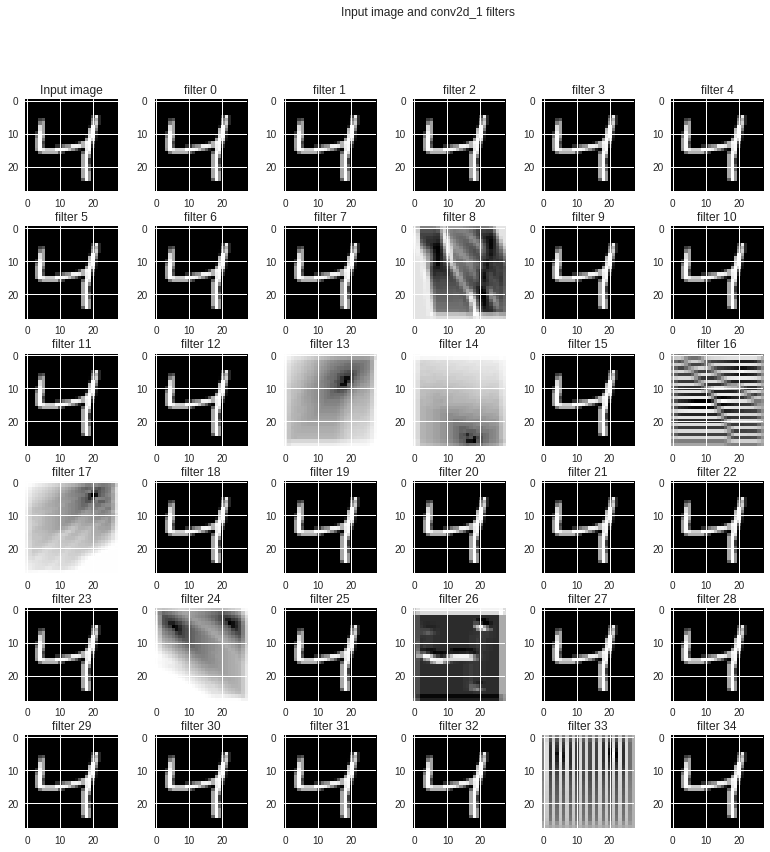

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

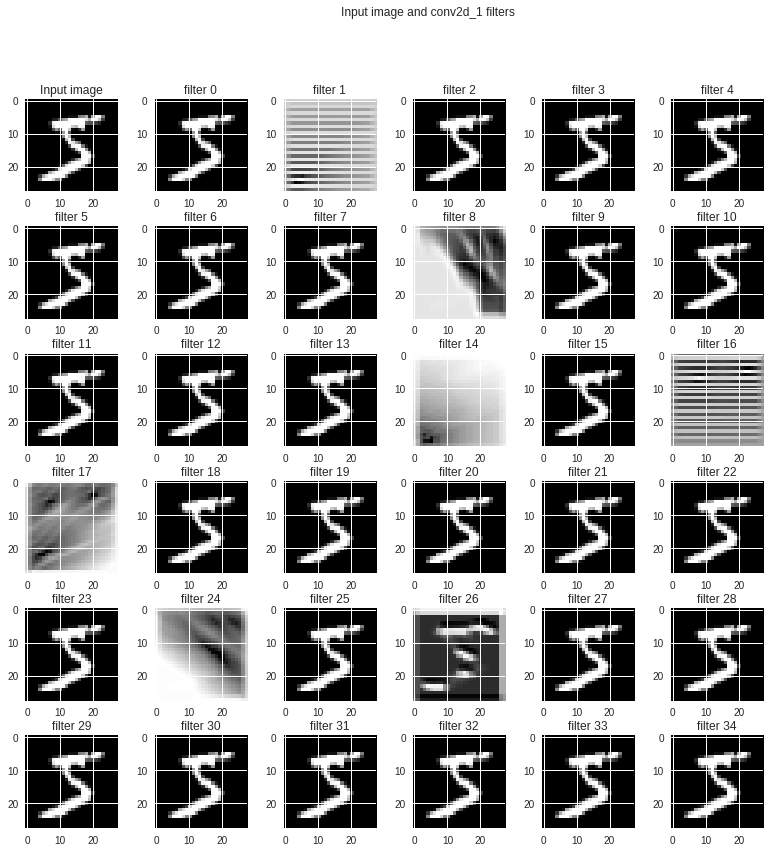

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

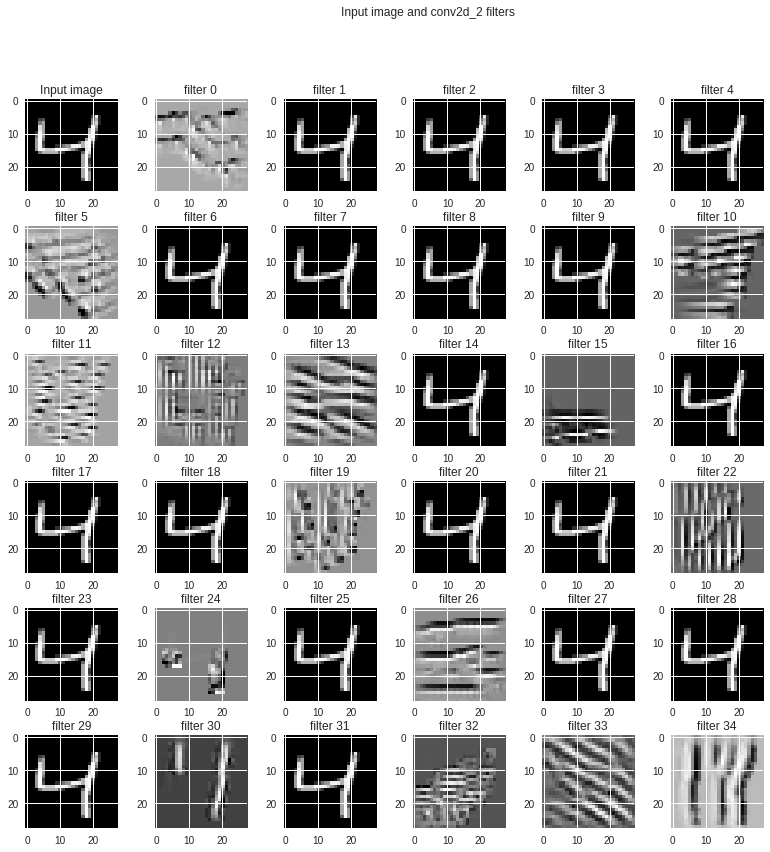

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()